In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
print(df.shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
num_cols = ['price', 'area']
cat_num_cols = [ 'bedrooms', 'bathrooms', 'stories', 'parking']
yes_no_cols = ['mainroad', 'guestroom' , 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
cat_col = ['furnishingstatus']

In [7]:
for col in yes_no_cols:
    df[col] = df[col].map({'yes' : 1, 'no':0})
    print(df[col].value_counts())

mainroad
1    468
0     77
Name: count, dtype: int64
guestroom
0    448
1     97
Name: count, dtype: int64
basement
0    354
1    191
Name: count, dtype: int64
hotwaterheating
0    520
1     25
Name: count, dtype: int64
airconditioning
0    373
1    172
Name: count, dtype: int64
prefarea
0    417
1    128
Name: count, dtype: int64


In [8]:
dummies = pd.get_dummies(df['furnishingstatus'], dtype=int, drop_first = True)
df = pd.concat([dummies, df], axis = 1)
df.drop(['furnishingstatus'], inplace=True, axis=1)

In [9]:
df.describe()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,545.000000,545.000000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.416514,0.326606,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,0.493434,0.469402,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,0.000000,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [15]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape, df_test.shape)
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

(381, 14) (164, 14)


In [48]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=7, random_state=42)

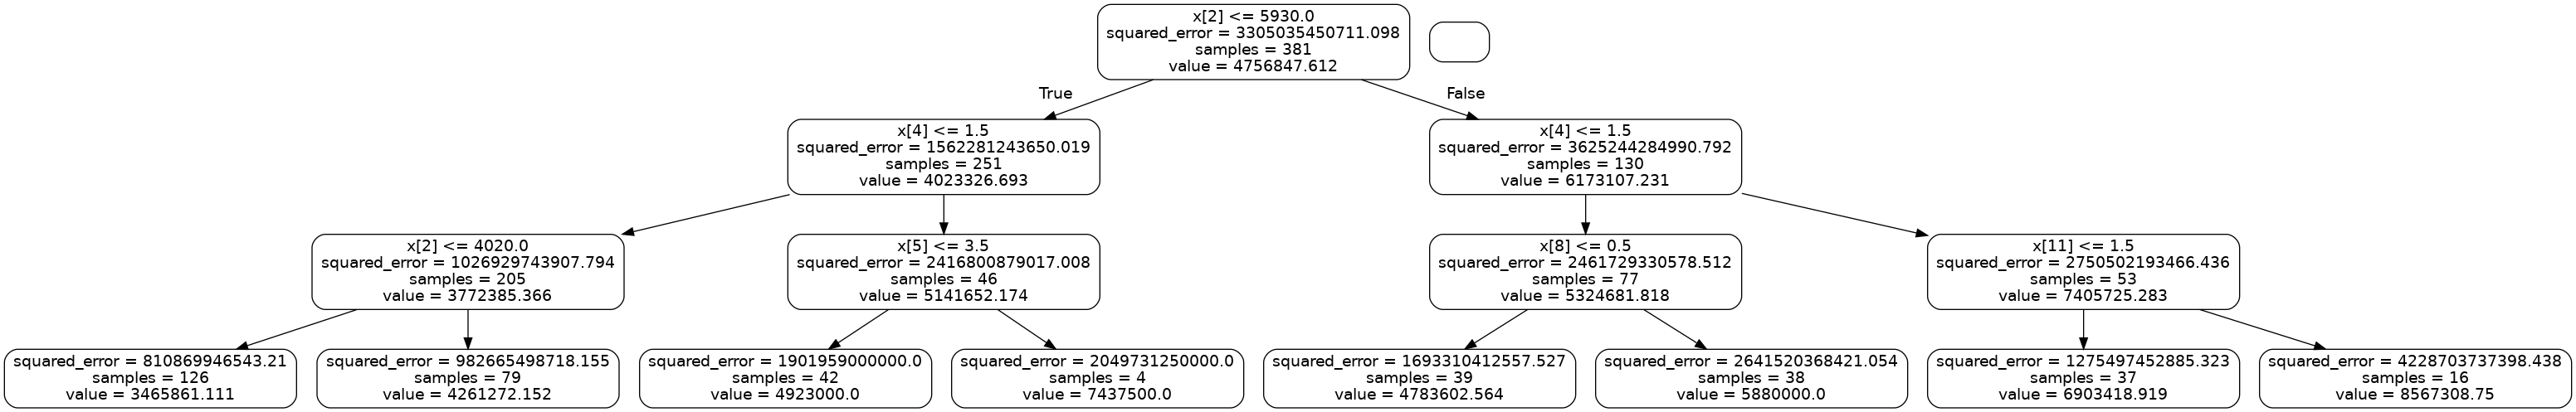

In [49]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(dt, rounded=True, out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [39]:
help(dot_data)

Help on StringIO object:

class StringIO(_TextIOBase)
 |  StringIO(initial_value='', newline='\n')
 |  
 |  Text I/O implementation using an in-memory buffer.
 |  
 |  The initial_value argument sets the value of object.  The newline
 |  argument is like the one of TextIOWrapper's constructor.
 |  
 |  Method resolution order:
 |      StringIO
 |      _TextIOBase
 |      _IOBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(...)
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __setstate__(...)
 |  
 |  close(self, /)
 |      Close the IO object.
 |      
 |      Attempting any further operation after the object is closed
 |      will raise a ValueError.
 |      
 |      This method has no effect if the file is already closed.
 |  
 |  getvalue(self, /)
 |      Retrieve the entire contents of the object.
 |  
 |  read(self, s